In [7]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("train.csv")

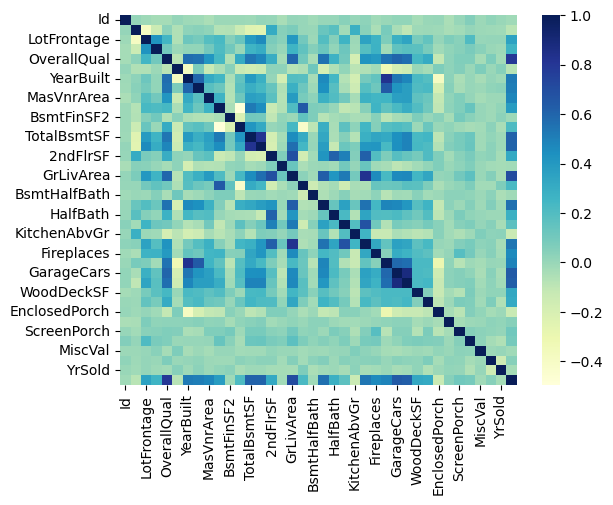

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
#pearson
pearson = df.corr()['SalePrice']
pearson = pearson.sort_values()
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu")

<AxesSubplot:>

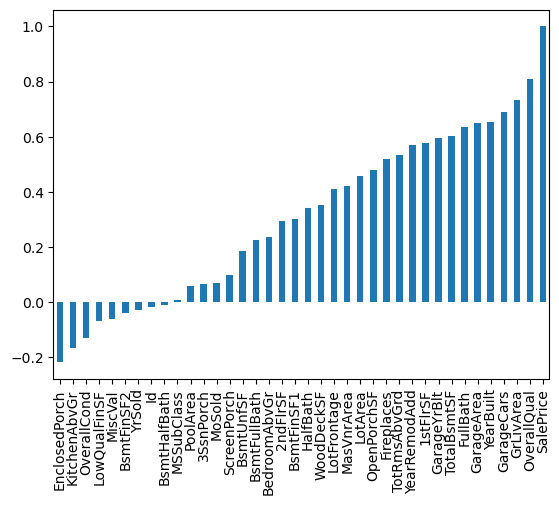

In [4]:
#méthode spearman
spearman = df.corr(method='spearman')['SalePrice']
spearman = spearman.sort_values()
spearman.plot.bar(x='SalePrice')

<AxesSubplot:>

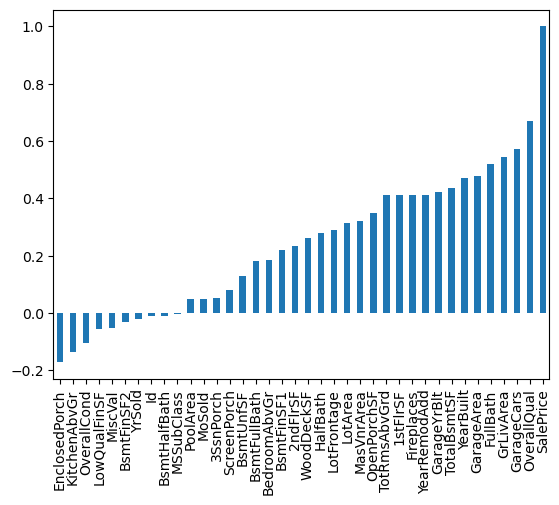

In [5]:
#méthode kendall
kendall = df.corr(method='kendall')['SalePrice']
kendall = kendall.sort_values()
kendall.heatmap

# Dropping

In [4]:
sf.describe()

count    38.000000
mean      0.293053
std       0.291845
min      -0.135907
25%       0.002612
50%       0.299982
75%       0.518948
max       1.000000
Name: SalePrice, dtype: float64

<AxesSubplot: >

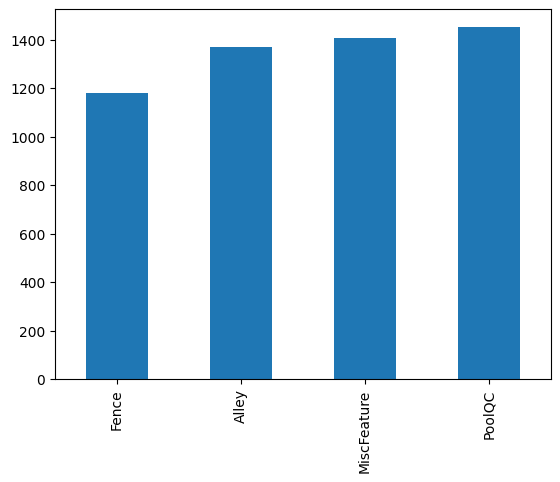

In [5]:
missing = df.isnull().sum().sort_values()
missing[missing>1000].plot(kind = 'bar')

In [6]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(columns=[column], axis=1, inplace=True)
    return df

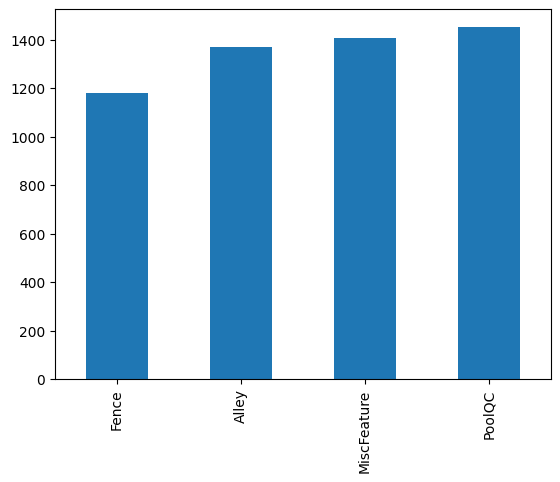

In [7]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(columns=[column], axis=1, inplace=True)
    return df

missing = df.isnull().sum().sort_values()
missing = missing[missing>1000]
missing.plot(kind = 'bar')

to_remove = []
for i in missing.keys():
    to_remove.append(i)

drop_columns(df,to_remove)

quantitative = [f for f in df.columns if df.dtypes[f] !='object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] =='object']

In [8]:
def get_dummies_df(df, categorical_columns):
    for column in categorical_columns:
        if column in df.columns:
            _df = pd.get_dummies(df[column])
            df = pd.concat([df, _df], axis=1, sort=False)
            df.drop(columns=[column], inplace=True)
    return df

df = get_dummies_df(df,qualitative)

In [9]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [10]:

from math import nan


def replace_nan_hard(df, Nan_columns):
    for column in Nan_columns:
        if column in df.columns:
            df[Nan_columns] = df[Nan_columns].fillna(df[Nan_columns].mean())
    return df

for column in df.columns :
    df = replace_nan_hard(df, column)
    df[column] = df[column].replace({nan: 0})

In [32]:
# importing libraries

# importing libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
  
# loading boston dataset
X, y = df.drop(columns="SalePrice"), df["SalePrice"]
X = X.drop(columns="Id")
  
# scaling the inputs
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
  
# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size = 0.3)
  
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model.fit(X_train, y_train)
  
# predicting the y_test
y_pred = model.predict(X_test)
  
# finding score for our model
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.892327769255


/Users/dev/ml/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
